In [2]:
# ----------------------------------------------------------------------
# Step 1: Import all necessary modules for analysis
# ----------------------------------------------------------------------
# import modules for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
# ----------------------------------------------------------------------
# Step 2: Set up db connection and session
# ----------------------------------------------------------------------
# set up sqlalchemy engine
from sqlalchemy import create_engine
engine = create_engine('sqlite:///hawaii.sqlite')

# set up sqlalchemy base
from sqlalchemy.ext.automap import automap_base
Base = automap_base()
Base.prepare(engine, reflect=True)

# map classes
Station = Base.classes.stations
Measurement = Base.classes.measurements

# set up session
from sqlalchemy.orm import Session
session = Session(engine)

Precipitation Analysis

1. Design a query to retrieve the last 12 months of precipitation data.

2. Select only the date and prcp values.

3. Load the query results into a Pandas DataFrame and set the index to the date column.

4. Plot the results using the DataFrame plot method.

pd.read_sql(session.query(Complaint).filter(Complaint.id == 2).statement,session.bind) 


In [4]:
# ----------------------------------------------------------------------
# Step 3: Select start and end dates for my trip
# ----------------------------------------------------------------------
start_date = '2018-06-29'
end_date = '2018-07-04'

In [5]:
# ----------------------------------------------------------------------
# Step 4: Plot 12 months of precipitation data using using DF.plot.
#         Note: Didn't like the way the assignment said to do this, so I
#         changed it and made a stacked bar chart by stations.
# ----------------------------------------------------------------------
# create variables for last year's date in string format and query (for readability)
last_year_start = (dt.date.today() - dt.timedelta(days=365)).isoformat()
query = f'SELECT date, precipitation FROM measurements WHERE date > "{last_year_start}"'

# read query into dataframe
last_year_prec_df = pd.read_sql(query, engine)
last_year_prec_df.head()

,date,precipitation
0,2017-04-07,0.0
1,2017-04-08,0.0
2,2017-04-09,0.0
3,2017-04-10,0.0
4,2017-04-11,0.0


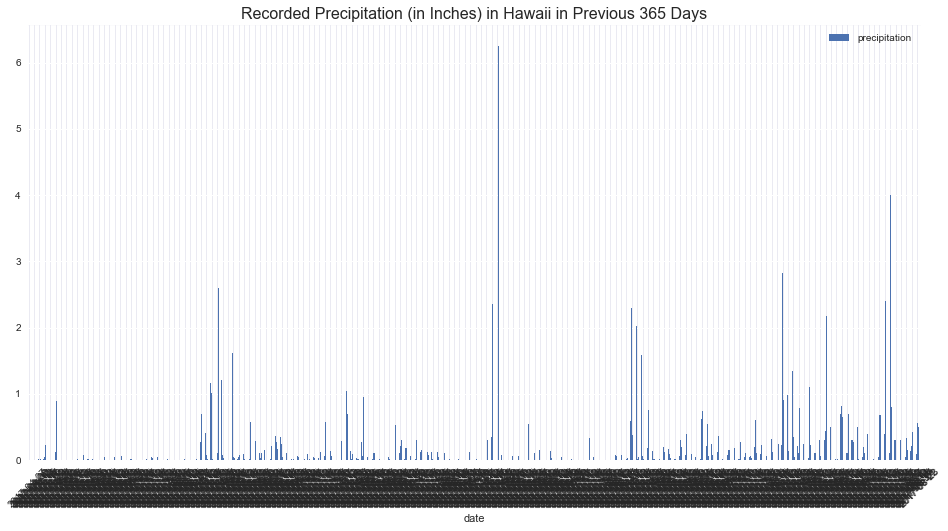

In [8]:
# set style
sns.set()
plt.rcParams["figure.figsize"] = [16,8]

# plot the dataframe
last_year_prec_df.plot.bar(x='date')
plt.title('Recorded Precipitation (in Inches) in Hawaii in Previous 365 Days', 
          size=16)
plt.xticks(rotation=45)
plt.show()

In [7]:
# display summary statistics
last_year_prec_df.describe()

,precipitation
count,727.000000
mean,0.175598
std,0.439748
min,0.000000
25%,0.000000
50%,0.020000
75%,0.150000
max,6.250000
